### **<span style="color:green">VISÃO GERAL DA BASE DE DADOS: California Housing</span>**

Esta base de dados contém informações sobre as habitações na Califórnia, coletadas a partir do censo de 1990. Ela é usada para analisar diversos aspectos do mercado imobiliário e para fazer previsões sobre preços de casas. Aqui estão algumas das variáveis incluídas:

- **MedInc**: Renda mediana dos habitantes de uma região (em dezenas de milhares de dólares).
- **HouseAge**: Idade mediana das casas em uma região.
- **AveRooms**: Número médio de cômodos por casa.
- **AveBedrms**: Número médio de quartos por casa.
- **Population**: População de uma região.
- **AveOccup**: Número médio de habitantes por unidade habitacional.
- **Latitude**: Latitude da região.
- **Longitude**: Longitude da região.

A meta é entender como diferentes características das casas e das regiões podem influenciar o mercado imobiliário na Califórnia. Essa base de dados pode ser usada para diversas análises, como identificar padrões, visualizar tendências e realizar previsões sobre preços de casas.

---

### **<span style="color:green">IMPORTS E CONFIGURAÇÕES</span>**

In [2]:
import pandas as pd
import numpy as np
#!pip install ipywidgets

In [3]:
# prompt: Crie para mim um método que recebe uma lista de textos e exiba um conjunto de radio buttons

import ipywidgets as widgets
from IPython.display import display

def exibir_alternativas(textos):
  """
  Cria um conjunto de radio buttons a partir de uma lista de textos.

  Args:
    textos: Uma lista de strings, onde cada string representa um texto
            para um radio button.
  """
  radio_buttons = widgets.RadioButtons(
      options=textos,
      description='',
      disabled=False
  )
  display(radio_buttons)

### **<span style="color:green">UM PEQUENO QUESTIONÁRIO ANTES DE SEGUIRMOS</span>**

#### **Enquadre o problema**

##### Quanto à supervisão humana, que modalidade de algoritmo você utilizaria para resolver esse problema?

In [4]:
exibir_alternativas(['Selecione a opção desejada', 'Supervisionados', 'Não supervisionados', 'Aprendizado por reforço'])

RadioButtons(options=('Selecione a opção desejada', 'Supervisionados', 'Não supervisionados', 'Aprendizado por…

##### Quanto à forma de aprendizado, como seu algoritmo trabalhará?

In [5]:
exibir_alternativas(['Selecione a opção desejada', 'Aprendizado em lote (dose única)', 'Aprendizado online (doses homeopáticas )'])

RadioButtons(options=('Selecione a opção desejada', 'Aprendizado em lote (dose única)', 'Aprendizado online (d…

##### Quanto ao paradigma de aprendizado, como você enquadraria os algoritmos utillizados para resolver o problema proposto?

In [6]:
exibir_alternativas(['Selecione a opção desejada', 'Aprendizado baseado em instâncias', 'Aprendizado baseado em modelos'])

RadioButtons(options=('Selecione a opção desejada', 'Aprendizado baseado em instâncias', 'Aprendizado baseado …

#### **Selecione uma medida de desempenho**

In [7]:
exibir_alternativas(['Selecione a opção desejada', 'MSE (Mean Squared Error)', 'RMSE (Root Mean Squared Error)'])

RadioButtons(options=('Selecione a opção desejada', 'MSE (Mean Squared Error)', 'RMSE (Root Mean Squared Error…

### **<span style="color:green">VISÃO GERAL DOS DADOS</span>**

In [8]:
CAMINHO_BASE_TREINAMENTO = 'C:/Users/clayt/Projetos/IDP/ml-01/dados/california_housing/train.csv'
CAMINHO_BASE_TESTE = 'C:/Users/clayt/Projetos/IDP/ml-01/dados/california_housing/test.csv'

Função que recebe um path de um csv e retorna um dataframe

In [9]:
def carregar_dados(path: str):
  dados = pd.read_csv(path)
  return dados

Utilize a função `carregar_dados(path: str)` para obter um dataframe a partir da planilha train.csv (CAMINHO_BASE_TREINAMENTO)

In [10]:
df = carregar_dados(path=CAMINHO_BASE_TREINAMENTO)

Visualize as 3 primeiras linhas do arquivo com a função `head()`

In [11]:
df.head(3)

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576


Visualize as 3 últimas linhas do arquivo com a função `tail()`

In [12]:
df.tail(3)

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
37134,37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387
37135,37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98,1.592
37136,37136,2.2419,34.0,5.424419,1.058685,1340.0,3.799065,36.34,-119.64,0.652


Utilize a função `info()` para obter informações importantes sobre o dataframe, como tipos das colunas, quantidade de valores nulos e quantidade de linhas. 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


Utilize função `describe()` para obter um resumo estatístico de um DataFrame ou de uma série de dados. Lembre-se, essa função é para ter uma visão geral dos dados e identificar rapidamente quaisquer anomalias ou padrões.

In [14]:
df.describe()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,37137.00000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000
mean,18568.00000,3.851029,26.057005,5.163124,1.062204,1660.778919,2.831243,35.570030,-119.554329,2.079751
std,10720.67281,1.803167,12.158221,1.206242,0.096490,1302.469608,2.702413,2.083179,1.974028,1.158571
min,0.00000,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,9284.00000,2.602300,17.000000,4.357522,1.020305,952.000000,2.394495,33.930000,-121.800000,1.208000
50%,18568.00000,3.515600,25.000000,5.068611,1.054545,1383.000000,2.744828,34.190000,-118.450000,1.808000
75%,27852.00000,4.699700,35.000000,5.858597,1.088825,1856.000000,3.125313,37.700000,-118.020000,2.660000
max,37136.00000,15.000100,52.000000,28.837607,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


Como iremos implementar um modelo de regressão, é fundamental que exista correlação entre variáveis independentes e dependente. Utilize a função `corr(method='spearman')` se desejar calcular a correlação de **spearman**, ou `corr()` para o método de **pearson** for mais apropriado.

In [15]:
df.corr(method='pearson')['MedHouseVal']

id            -0.001358
MedInc         0.701925
HouseAge       0.103210
AveRooms       0.366727
AveBedrms     -0.067487
Population    -0.038479
AveOccup      -0.048475
Latitude      -0.116499
Longitude     -0.056742
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

Para problemas de regressão, o gráfico de dispersão (scatter) deve ser o primeiro a ser utilizado em suas análises. Visualize como os dados estão dispersos, buscando pela existência de uma relação linear entre as variáveis <u>MedInc</u> e <u>MedHouseVal</u>. Você pode utililizar o Matplotlib, Seaborn ou o pandas. Para esse exemplo, utilize a função `plot(kind='scatter')` do próprio dataframe pandas. **IMPORTANTE**: A variável que desejamos prever deve estar no eixo y. 

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

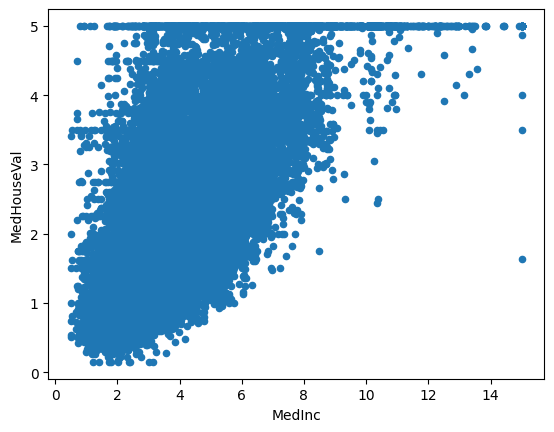

In [16]:
df.plot(kind='scatter', x='MedInc', y='MedHouseVal')

### **<span style="color:green">PREVENDO O VALOR MÉDIO DO IMÓVEL</span>**

Utilize o train_test_split do pacote sklearn.model_selection para dividir os dados em treinamento e teste. Em geral, utilizam-se (80-70)% para treino (30-20)% por cento para testes. Por ora, utilize apenas 10% para testes. 

In [17]:
from sklearn.model_selection import train_test_split

treino, teste = train_test_split(df, train_size=0.9, random_state=42)

Crie o X e y de treino e teste seguindo o modelo do que foi apresentado no notebook `01_felicidade_x_pib_ocde.ipynb`. Utilize apenas os atributos **MedInc e MedHouseVal**

In [18]:
x_treino = treino[['MedInc']]
y_treino = treino['MedHouseVal']

x_teste = teste[['MedInc']]
y_teste = teste['MedHouseVal']

Treine o modelo LinearRegression

In [19]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X=x_treino, y=y_treino)

LinearRegression()

Faça previsões do valor médio dos imóveis e compare os valores reais e os valores previstos. 

In [20]:
previsoes = linear_model.predict(X=x_teste)

print(f'Valores Reais: {y_teste.to_list()[:5]}')
print(f'Valores previstos: {previsoes[:5]}')

Valores Reais: [1.035, 1.969, 2.638, 1.188, 0.669]
Valores previstos: [2.63844825 1.85938747 2.61863127 2.20903506 1.06286241]


### **<span style="color:green">AVALIE O DESEMPENHO DO MODELO COM A RAIZ QUADRADA DO ERRO QUADRÁTICO MÉDIO (RMSE)</span>**

Utilize o método `mean_squared_error` do pacote sklearn.metrics para calcular o **MSE**. Após isso, utilize o método `sqrt()` do numpy para obter a raiz quadrada do MSE. Isso fornecerá o **RMSE**.

In [21]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred=previsoes, y_true=y_teste)
mse

0.748156048334495

In [22]:
rmse = np.sqrt(mse)
rmse

np.float64(0.8649601426276792)

**Quando utilizar MSE OU RMSE?**
- **MSE (Mean Squared Error):**
  - **Quando usar:** Use o MSE quando você quiser penalizar os erros grandes de maneira mais severa, pois ele eleva os erros ao quadrado. É útil para cenários onde erros maiores são significativamente mais prejudiciais.

- **RMSE (Root Mean Squared Error):**
  - **Quando usar:** Use o RMSE quando você quiser uma métrica que seja na mesma unidade dos dados originais, o que facilita a interpretação dos resultados. É adequado para cenários onde você deseja entender o impacto dos erros no mesmo contexto dos valores reais.

Avalie o R2 Score.

In [23]:
from sklearn.metrics import r2_score

r2_score(y_pred=previsoes, y_true=y_teste)

0.4611130280263125

### **<span style="color:green">FEATURE ENGINEERING - CRIE, TRANSFORME, NORMALIZE/PADRONIZE, COMBINE/SEPARE VARIÁVEIS</span>**

Crie nos dataframes de treino e teste, aqueles que você dividiu com o train_test_split, um atributo chamado relacao_populacao_ocupacao. Ele será a divisão da população(**Population**) pela ocupação média da casa (**AveOccup**). A suposição é a seguinte: A relação entre pessoas e quartos influencia no valor de venda. 

In [24]:
treino['relacao_populacao_ocupacao'] = treino['Population'] / treino['AveOccup'] 
teste['relacao_populacao_ocupacao'] = teste['Population'] / teste['AveOccup'] 

Implemente uma regressão múltipla utilizando as colunas **quartos_por_comodo** e **MedInc** no X da regressão. O valor de y permanece sendo **MedHouseVal**.

In [25]:
linear_model = LinearRegression()
linear_model.fit(X=treino[['relacao_populacao_ocupacao', 'MedInc']], y=treino['MedHouseVal'])

ypred = linear_model.predict(X=teste[['relacao_populacao_ocupacao', 'MedInc']])

Avalie se houve melhora ou piora no desempenho do MSE e RMSE.

In [26]:
mse = mean_squared_error(y_pred=ypred, y_true=teste['MedHouseVal'])
mse

0.7452979295500577

In [27]:
rmse = np.sqrt(mse)
rmse

np.float64(0.8633063937849978)

Avalie o comportamento do R-Quadrado para obter indicativo de aumento ou redução da explicabilidade da variação dos dados após a inclusão do novo atributo.

In [28]:
from sklearn.metrics import r2_score

r2_score(y_pred=ypred, y_true=teste['MedHouseVal'])

0.46317169343537423

### **<span style="color:green">PESQUISE OUTROS MODELOS LINERARES, INCLUA NOVOS ATRIBUTOS, FAÇA PREVISÕES E COMPARE A PERFORMANCE COM O LINEAR REGRESSION</span>**

**Teste ARDRegression, Ridge, ElasticNet e BayesianRidge**.

In [77]:
from sklearn.linear_model import ARDRegression

linear_model = ARDRegression()
linear_model.fit(X=treino[['relacao_populacao_ocupacao', 'MedInc']], y=treino['MedHouseVal'])
ypred = linear_model.predict(X=teste[['relacao_populacao_ocupacao', 'MedInc']])

In [78]:
mean_squared_error(y_pred=ypred, y_true=teste['MedHouseVal'])

0.6975530065800742

In [79]:
np.sqrt(mean_squared_error(y_pred=ypred, y_true=teste['MedHouseVal']))

np.float64(0.8351963880310272)

In [80]:
r2_score(y_pred=ypred, y_true=teste['MedHouseVal'])

0.4803281127256216